<a href="https://colab.research.google.com/github/arifanwar02431/Materi/blob/main/Praktik_AI/7_State_space_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# State Space Models

Linear Time Invariant (LTI) state space models are a linear representation of a dynamic system in either discrete or continuous time. Putting a model into state space form is the basis for many methods in process dynamics and control analysis. Below is the continuous time form of a model in state space form.

\begin{eqnarray}
\dot{\mathbf{x}}(t) &= \mathbf{A}(t) \mathbf{x}(t) + \mathbf{B}(t) \mathbf{u}(t) \\
\mathbf{y}(t) &= \mathbf{C}(t) \mathbf{x}(t) + \mathbf{D}(t) \mathbf{u}(t)
\end{eqnarray}

Simplified notation
\begin{eqnarray}
\dot{\mathbf{x}} &= \mathbf{A} \mathbf{x} + \mathbf{B} \mathbf{u} \\
\mathbf{y} &= \mathbf{C} \mathbf{x} + \mathbf{D} \mathbf{u}
\end{eqnarray}

where:
1. $\mathbf{x}(\cdot)$ is called the "state vector", $\mathbf{x}(t) \in \mathbb{R}^n$
2. $\mathbf{y}(\cdot)$ is called the "output vector", $\mathbf{y}(t) \in \mathbb{R}^q$
3. $\mathbf{u}(\cdot)$ is called the "input (or control) vector", $\mathbf{u}(t) \in \mathbb{R}^p$
4. $\mathbf{A}(\cdot)$ is the "state (or system) matrix", $\dim[\mathbf{A}(\cdot)] = n \times n$
5. $\mathbf{B}(\cdot)$ is the "input matrix", $\dim[\mathbf{B}(\cdot)] = n \times p$
6. $\mathbf{C}(\cdot)$ is the "output matrix", $\dim[\mathbf{C}(\cdot)] = q \times n$
7. $\mathbf{D}(\cdot)$ is the "feedthrough (or feedforward) matrix" (in cases where the system model does not have a direct feedthrough, $\mathbf{D}(\cdot)$ is the zero matrix), $\dim[\mathbf{D}(\cdot)] = q \times p$,
8. $\dot{\mathbf{x}}(t)$ := $\dfrac{\text{d}}{\text{d}t} \mathbf{x}(t)$.

## Stability
The linear state space model is stable if all eigenvalues of A are negative real numbers or have negative real parts to complex number eigenvalues. If all real parts of the eigenvalues are negative then the system is stable, meaning that any initial condition converges exponentially to a stable attracting point. If any real parts are zero then the system will not converge to a point and if the eigenvalues are positive the system is unstable and will exponentially diverge.Stability
The linear state space model is stable if all eigenvalues of A are negative real numbers or have negative real parts to complex number eigenvalues. If all real parts of the eigenvalues are negative then the system is stable, meaning that any initial condition converges exponentially to a stable attracting point. If any real parts are zero then the system will not converge to a point and if the eigenvalues are positive the system is unstable and will exponentially diverge.

## First Order System in State Space
The state space form can be difficult to grasp at first so consider an example to transform a first order linear system (without time delay) into state space form.

$$
\tau_p \dfrac{\text{d}y}{\text{d}t} = -y + K_p u
$$

Divide both sides by $\tau_p$ and add the output relationship $x=y$ and $\dot{x} = \dot{y}$ to give the following in state space form.

\begin{eqnarray}
\dot{x} &=& \left[-\dfrac{1}{\tau_p}\right] x + \left[\dfrac{K_p}{\tau_p}\right] u \\
y &=& [1] x + [0] u
\end{eqnarray}

## Second Order System in State Space

\begin{eqnarray}
\tau_1 \dfrac{\text{d}x_1}{\text{d}t} &=& -x_1 + K_p u \\
\tau_{2} \dfrac{\text{d}x_2}{\text{d}t} &=& -x_2 + x_1
\end{eqnarray}

and $y=x_2$

\begin{eqnarray}
\begin{bmatrix}
\dot x_1 \\
\dot x_2
\end{bmatrix} &=&
\begin{bmatrix}
-\dfrac{1}{\tau_1} & 0 \\
\dfrac{1}{\tau_2} & -\dfrac{1}{\tau_2}
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
+
\begin{bmatrix}
\dfrac{K_p}{\tau_1}\\
0
\end{bmatrix} u \\
y &=&
\begin{bmatrix}
0 & 1
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix} +
\begin{bmatrix}
0
\end{bmatrix} u
\end{eqnarray}

## Exercise
Put the following equations into state space form by determining matrices $\mathbf{A}$, $\mathbf{B}$, $\mathbf{C}$, and $\mathbf{D}$. Simulate a step response for each model and determine whether the system is stable or unstable.
Simulate a step response for each model and determine whether the system is stable or unstable.

## 1. First order differential equation
\begin{eqnarray}
3 \dfrac{\text{d}x}{\text{d}t} + 12 x &=& 6 u \\
y &=& x
\end{eqnarray}

### State space ??

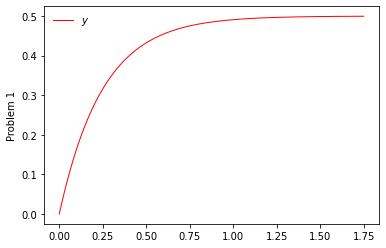

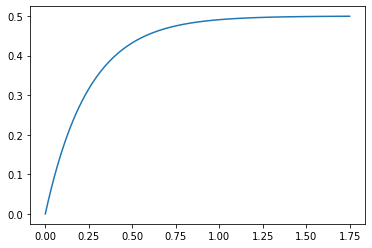

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
#plt.rcParams['text.usetex'] = True

# problem 1
A = [-4.0]
B = [2.0]
C = [1.0]
D = [0.0]
sys1 = signal.StateSpace(A,B,C,D)
t1,y1 = signal.step(sys1)

plt.figure(1)
plt.plot(t1,y1,'r-',linewidth=1)
plt.ylabel('Problem 1')
plt.legend([r'$y$'], loc='best', frameon=False)

from scipy.integrate import odeint
u = 1

def model(x, t):
  dxdt = -4*x + 2 * u
  return dxdt

x0 = 0
y = odeint(model, x0, t1)

plt.figure(2)
plt.plot(t1, y)

## 2. Second order differential equations
\begin{eqnarray}
2 \dfrac{\text{d}x_1}{\text{d}t} + 6  x_1 &=& 8 u_2 \\
3 \dfrac{\text{d}x_2}{\text{d}t} + 6  x_1 + 9 x_2 &=& 0 \\
y &=& \dfrac{x_1 + x_2}{2}
\end{eqnarray}

In [ ]:
np.random.randint(1, 2)

1

### State space ??

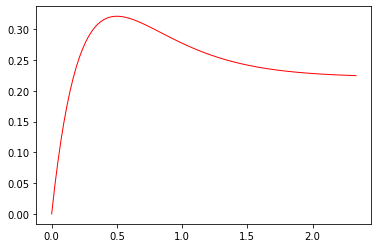

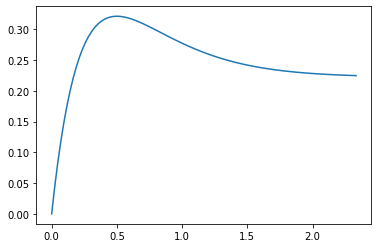

In [ ]:
A = [[-3., 0.], [-2., -3.]]
B = [[4.], [0.]]
C = [0.5, 0.5]
D = [0]
sys1 = signal.StateSpace(A,B,C,D)
t1,y1 = signal.step(sys1)

plt.figure(1)
plt.plot(t1,y1,'r-',linewidth=1)

u = 1
def model(z, t):
  dx1dt = -3.0 * z[0] + 4*u
  dx2dt = -2.0 * z[0] - 3.0 * z[1]
  return [dx1dt, dx2dt]
z0 = [0,0]
y = odeint(model, z0, t1)
plt.figure(2)
plt.plot(t1, (y[:, 0] + y[:, 1])/2)


## 3. Second order differential equations

\begin{eqnarray}
4 \dfrac{\text{d}^2y}{\text{d}t^2} + 2 \frac{\text{d}y}{\text{d}t} + y &=& 3u
\end{eqnarray}

### State space ??

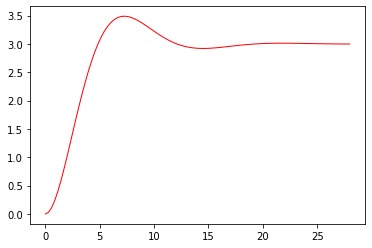

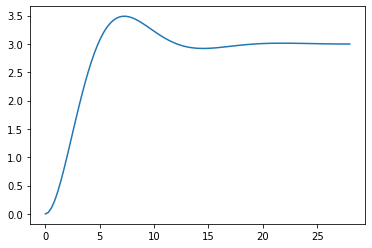

In [ ]:
#CODE GOES HERE

A = [[0., 1.], [-1/4., -1/2.]]
B = [[0.], [3/4.]]
C = [1., 0.]
D = [0]
sys1 = signal.StateSpace(A,B,C,D)
t1,y1 = signal.step(sys1)

plt.figure(1)
plt.plot(t1,y1,'r-',linewidth=1)

u = 1
def model(z, t):
  d2ydt2 = -0.5 * z[1] - 1/4. * z[0] + 3/4. * u
  dydt = z[1]
  return [dydt, d2ydt2]

z0 = [0,0]
y = odeint(model, z0, t1)
plt.figure(2)
plt.plot(t1, y[:,0])

$$
\frac{d^2\theta}{dt^2}+\frac{g}{l} \sin\theta=0
$$

![image](https://upload.wikimedia.org/wikipedia/commons/2/24/Oscillating_pendulum.gif)

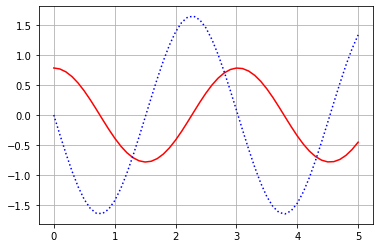

In [ ]:
#CODE GOES HERE

g = 9.8
l = 2.1

t = np.linspace(0, 5, 51)
def model(z, t):
  d2ydt2 = -g/l * np.sin(z[0])
  dydt = z[1]
  return [dydt, d2ydt2]

z0 = [np.radians(45),0]
y = odeint(model, z0, t)

plt.figure(1)
plt.plot(t, y[:,0], "r-")
plt.plot(t, y[:,1], "b:")
plt.grid()
